# CS 329E Term Project

### Yichen Pan yp5243
### Ziyue Fan zf2638

In [1]:
# Standard Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Load our Dataset

In [2]:
# loading in our data
df = pd.read_csv("marketing_campaign.csv",sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## 3.1 Dataset Description
Our dataset called "Customer Personality Analysis" and it is from Kaggle https://www.kaggle.com/imakash3011/customer-personality-analysis. The dataset collected the information from the target customers regarding their behaviors in the business. It contains the customers' year of birth, education level, marital status, income, number of children or teenagers, the purchase amounts of different products, the differenct purchasing places(Web, store,etc.), the campaign accepted status, and so on. There is a more specific description of our attributes below.

## Attributes

### People

-ID: Customer's unique identifier

-Year_Birth: Customer's birth year

-Education: Customer's education level

-Marital_Status: Customer's marital status

-Income: Customer's yearly household income

-Kidhome: Number of children in customer's household

-Teenhome: Number of teenagers in customer's household

-Dt_Customer: Date of customer's enrollment with the company

-Recency: Number of days since customer's last purchase

-Complain: 1 if customer complained in the last 2 years, 0 otherwise

### Products

-MntWines: Amount spent on wine in last 2 years

-MntFruits: Amount spent on fruits in last 2 years

-MntMeatProducts: Amount spent on meat in last 2 years

-MntFishProducts: Amount spent on fish in last 2 years

-MntSweetProducts: Amount spent on sweets in last 2 years

-MntGoldProds: Amount spent on gold in last 2 years

### Promotion

-NumDealsPurchases: Number of purchases made with a discount

-AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

-AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

-AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

-AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

-AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

-Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

-NumWebPurchases: Number of purchases made through the company’s web site

-NumCatalogPurchases: Number of purchases made using a catalogue

-NumStorePurchases: Number of purchases made directly in stores

-NumWebVisitsMonth: Number of visits to company’s web site in the last month

#### Source: https://www.kaggle.com/imakash3011/customer-personality-analysis

## 3.2 Data Cleaning and Preparation

"Customer Personality Analysis" is a relative large dataset for this project, which has a total of 2,240 rows, so we decide to reduce it to no more than 2000 observations in the data cleaning process. 

Since reducing the number of observations is one of the objectives, we plan to directly drop null values instead of replacing them with mean values. 

In [17]:
# 1. Drop null values
df.isnull().sum() # check which column contain null
# Since "Income" column has 24 null values, we drop 24 observations
df = df.dropna()

In [18]:
# 2. Drop “Income" outlier
# Our customers have a wide range of yearly household income. 
# However, when looking at the dataset, there is a outlier which is 666,666, so we drop it. 
df = df.drop(df[(df['Income'] > 200000)].index)

In [19]:
# 3. Drop rows with "Recency" >= 90
# Those customers' last purchase day is at least 90 days ago, since it has been a long time they didn't purchase our product, we regard these customers' information are not that useful and drop those rows
df = df.drop(df[(df['Recency'] >= 90)].index)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,child
0,5524,1957,1,0,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,64,0
1,2174,1954,1,0,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,67,2
2,4141,1965,1,1,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,56,0
3,6182,1984,1,1,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,37,1
5,7446,1967,2,1,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,0,3,11,0,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,1,1,34421.0,1,0,01-07-2013,81,3,...,0,0,0,0,0,3,11,0,47,1
2235,10870,1967,1,1,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,54,1
2236,4001,1946,2,1,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,75,3
2238,8235,1956,2,1,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,65,1


In [20]:
# 4. Convert categorical features to numerical values
df['Marital_Status'].replace(to_replace=['Single','Alone','Divorced','Absurd','YOLO','Widow'], 
                             value=[0,0,0,0,0,0],inplace=True)
df['Marital_Status'].replace(to_replace=['Married','Together'], value=[1,1],inplace=True)
# Divided into 2 groups
# 0: 'Single','Alone','Divorced','Absurd','YOLO','Widow'
# 1: 'Married','Together'

df['Education'].replace(to_replace=['Basic','2n Cycle','Graduation','Master','PhD'], value=[0,0,1,2,2],inplace=True)
# Basic: 0, 2n Cycle: 0, (Undergraduate)
# Graduation: 1, (Graduate)
# Master: 2, PhD: 2 (Postgraduate)

In [21]:
# 5. Create a age column
age = []
for i in df['Year_Birth']:
    age.append(2021-i)
df['age'] = age

In [22]:
# 6. Combine 'Kidhome' and 'Teenhome' as one column named 'child'
df['child'] = df.Kidhome.values + df.Teenhome.values

In [23]:
# 7. Create a new dataframe for analysis without unneeded columns
df_consumer = df[['Education','Marital_Status','Income','Recency','MntWines','MntFruits','MntFishProducts',
                  'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumStorePurchases',
                  'age','child','Response']]
df_consumer

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,age,child,Response
0,1,0,58138.0,58,635,88,172,88,88,3,8,4,64,0,1
1,1,0,46344.0,38,11,1,2,1,6,2,1,2,67,2,0
2,1,1,71613.0,26,426,49,111,21,42,1,8,10,56,0,0
3,1,1,26646.0,26,11,4,10,3,5,2,2,4,37,1,0
5,2,1,62513.0,16,520,42,0,42,14,2,6,10,54,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1,1,34421.0,81,3,3,6,2,9,1,1,2,47,1,0
2235,1,1,61223.0,46,709,43,42,118,247,2,9,4,54,1,0
2236,2,1,64014.0,56,406,0,0,0,8,7,8,5,75,3,0
2238,2,1,69245.0,8,428,30,80,30,61,2,6,10,65,1,0


#### Result: After cleaning the dataset by dropping missing values and outlier, we have a total of 2,000 observations. 

## 3.3 Research Question & Learning Model

**Research Question:** How could the customers be clustered? How can we predict their future response to marketing campaign? With the Customer Personality Analysis dataset, we aim to help business to identify potential customers who will most likely to react in the marketing campaign. Helping business understand more about its customer group and characteristics can make the campaign more successful and targeted. 

**What we want to learn from the data:** We want to learn how different clusters of customers respond to the campaign and the personalities of each clusters, which will help us do better future marketing. By applying different learning models, we want to predict which customers will response to marketing campaign. 

**Learning Models:** With this dataset, we planned to perform different learning models. We want to apply clustering to divide customers in different personality groups and also apply knn to predict customer's response to marketing campaign.

Predict **'Response'** column using following features:
   * **Education**
   * **Marital_Status**
   * **Income**
   * **Recency**
   * **MntWines**
   * **MntFruits**
   * **MntFishProducts**
   * **MntSweetProducts**
   * **MntGoldProds**
   * **NumDealsPurchases**
   * **NumWebPurchases**
   * **NumStorePurchases**
   * **age**
   * **child**

## 3.4 Current Expectation

Before analyzing the model, we expect that the customer may have different demands depending on the education, income, the number of family members(with kids), and marital status. For instance, customers living alone may have fewer living expenses than customers who are married. The customers who have more children may purchase a higher amount of sweets and have relatively short recency. The high-income customers may spend more money on wines and gold in stores. The customers who are more educated may have more Web purchases. We expect to have roughly 4 to 8 clusters of customers. The customers who have more family members, are middle-class, and have a lower level of education tend to accept campaigns more often.



## 3.5 Project Evaluation

To evaluate our project, we will employ visualization and plot our results from different learning models. 

To access the correctness of our models, we implement a new model with outliers to compare with our clustering model, and we test different k values to compare their accuaries. 

We expect we will have 4 to 8 clusters representing different behaviors for customers and an accuary of around 80% for predicting whether customer response in the market campaign or not.

# 4 Implementation

## 4.1 Clustering with DBSCAN

In [24]:
# clustering
from sklearn.cluster import DBSCAN
y = df_consumer['Response']
X = df_consumer[['Education','Marital_Status','Income','Recency','MntWines','MntFruits','MntFishProducts',
                  'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumStorePurchases',
                  'age','child']].to_numpy()
clustering = DBSCAN(eps=500, min_samples=10).fit(X)

In [55]:
# visualize the result from scikit-learn lib
labels = clustering.labels_
sk_df = df_consumer.copy()
sk_df['Assigned To'] = labels

u_labels = np.unique(sk_df['Assigned To']) 
print(len(u_labels))
print(u_labels)
#for i in u_labels:
 #   label = sk_df['Assigned To']
  #  x = sk_df[label == i].drop(['Response', 'Assigned To','Income'], axis=1).to_numpy()[:,4]
   # y = sk_df[label == i]['Income']
    #plt.scatter(x , y , label = i)
#plt.title('DBScan Scatter Plot with Color Representing Clusters with scikit-learn library')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.legend()
#plt.show()

6
[-1  0  1  2  3  4]


### Visulization with sns

In [26]:
import seaborn as sns

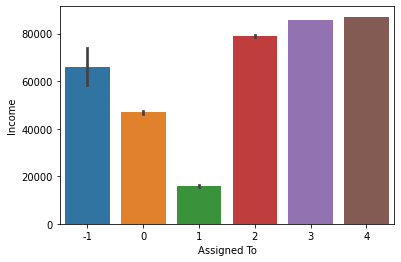

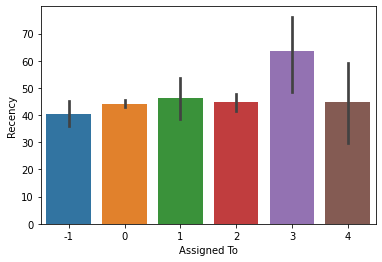

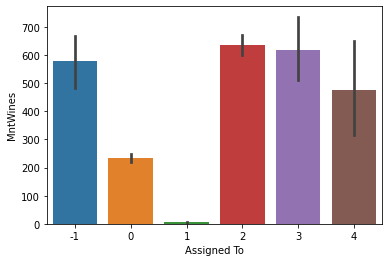

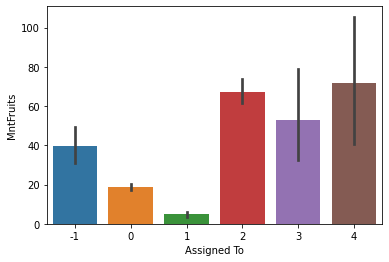

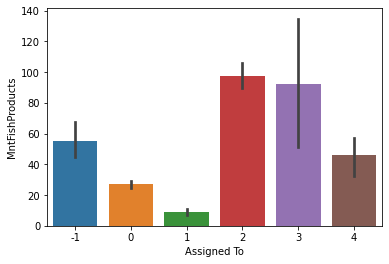

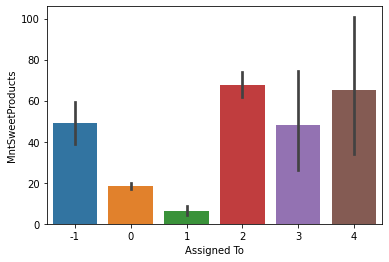

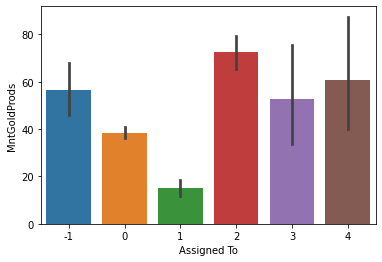

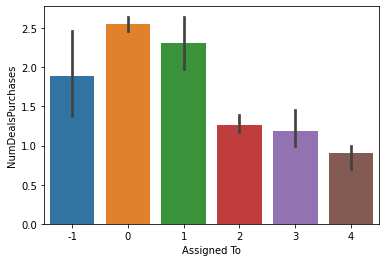

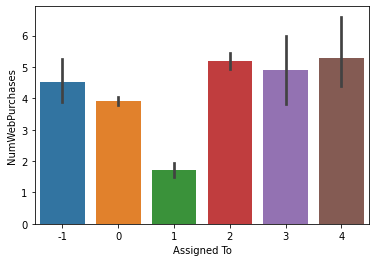

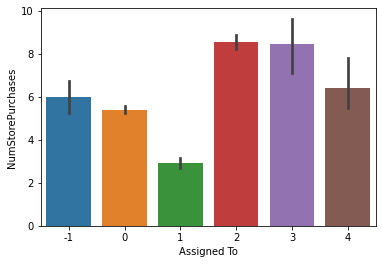

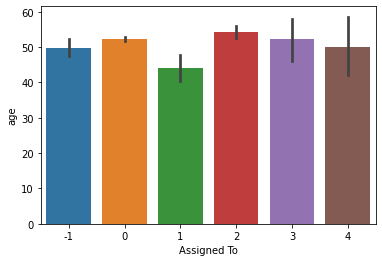

In [27]:
numerical_v = ['Income', 'Recency', 'MntWines',
       'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'age']

for i in numerical_v:
    plt.figure()
    sns.barplot(y=sk_df[i], x=sk_df['Assigned To'])
    plt.show()

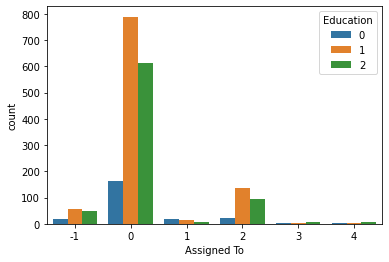

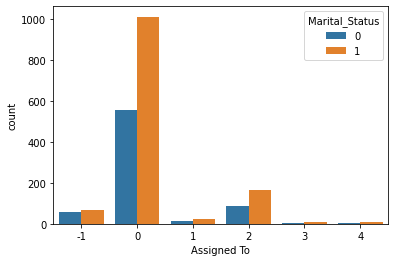

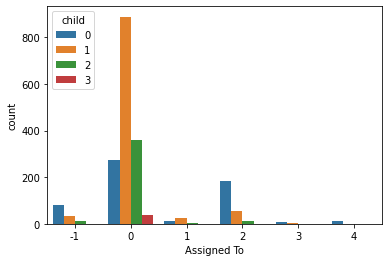

In [28]:
categorical_v = ['Education', 'Marital_Status', 'child']

for i in categorical_v:
    plt.figure()
    sns.countplot(x=sk_df['Assigned To'], data=sk_df, hue=sk_df[i])
    plt.show()

### Summary from Data Visulization

**Cluster-1** outliers

**Cluster0:** Low but moderate income, most likely to purchase with deals, most graduate and postgraduate education background, 2/3 of married, most have 1 or more child

**Cluster1:** Low income, seldomly purchase but likely purchase with deals, mostly undergraduate education background

**Cluster2:** Moderate income, over a half have no child

**Cluster3:** Moderate to high income, Long time didn't purchase, over a half have no child

**Cluster4:** High income, seldomly purchase deals, most postgraduate education background, most have no child, more likely to purchase on website rather than in store

**Cluster 2, 3, 4 are mostly enjoy purchasing in stores and websites, but less likely with deals. Cluster 0 and 1 purchase less frequently but love to purchase with deals.** 

## 4.2 Conduct a new analysis with the outliers

### Data Cleaning

In [29]:
df_outlier = pd.read_csv("marketing_campaign.csv",sep="\t")
# 1. Drop null values
df_outlier.isnull().sum() # check which column contain null
# Since "Income" column has 24 null values, we drop 24 observations
df_outlier = df_outlier.dropna()

# 2. Convert categorical features to numerical values
df_outlier['Marital_Status'].replace(to_replace=['Single','Alone','Divorced','Absurd','YOLO','Widow'], 
                             value=[0,0,0,0,0,0],inplace=True)
df_outlier['Marital_Status'].replace(to_replace=['Married','Together'], value=[1,1],inplace=True)
# Divided into 2 groups
# 0: 'Single','Alone','Divorced','Absurd','YOLO','Widow'
# 1: 'Married','Together'

df_outlier['Education'].replace(to_replace=['Basic','2n Cycle','Graduation','Master','PhD'], value=[0,0,1,2,2],inplace=True)
# Basic: 0, 2n Cycle: 0, (Undergraduate)
# Graduation: 1, (Graduate)
# Master: 2, PhD: 2 (Postgraduate)

# 3. Create a age column
age = []
for i in df_outlier['Year_Birth']:
    age.append(2021-i)
df_outlier['age'] = age

# 4. Combine 'Kidhome' and 'Teenhome' as one column named 'child'
df_outlier['child'] = df_outlier.Kidhome.values + df_outlier.Teenhome.values

# 5. Create a new dataframe for analysis without unneeded columns
df_consumer_outlier = df_outlier[['Education','Marital_Status','Income','Recency','MntWines','MntFruits','MntFishProducts',
                  'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumStorePurchases',
                  'age','child','Response']]

## Clustering with Outliers

In [32]:
# clustering
from sklearn.cluster import DBSCAN
new_y = df_consumer_outlier['Response']
new_X = df_consumer_outlier[['Education','Marital_Status','Income','Recency','MntWines','MntFruits','MntFishProducts',
                  'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumStorePurchases',
                  'age','child']].to_numpy()
new_clustering = DBSCAN(eps=500, min_samples=10).fit(new_X)

In [34]:
new_labels = new_clustering.labels_
new_sk_df = df_consumer_outlier.copy()
new_sk_df['Assigned To'] = new_labels

### Visulization with sns

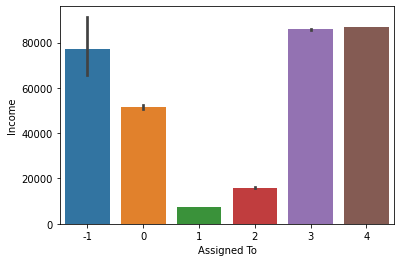

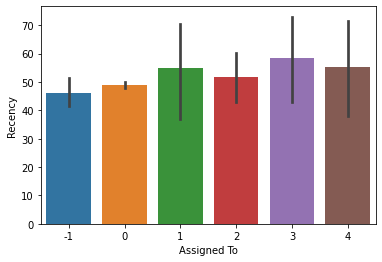

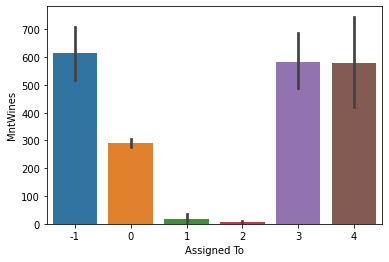

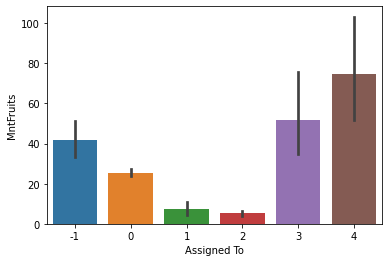

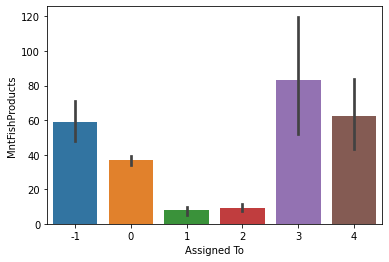

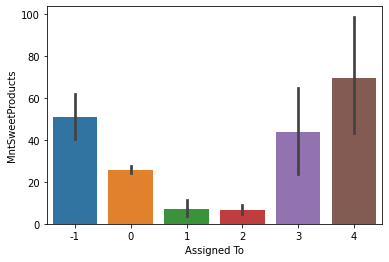

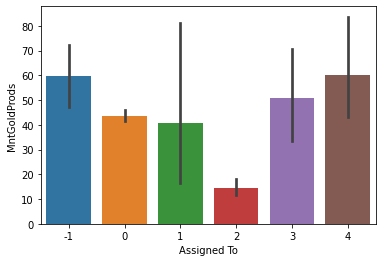

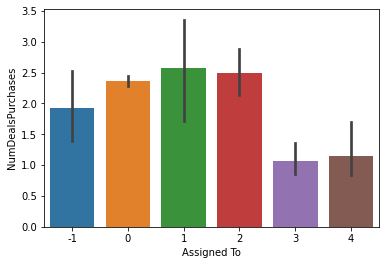

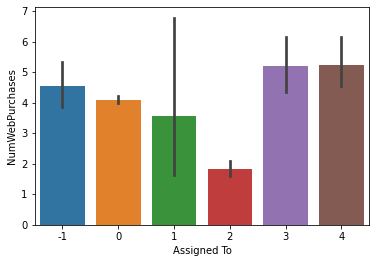

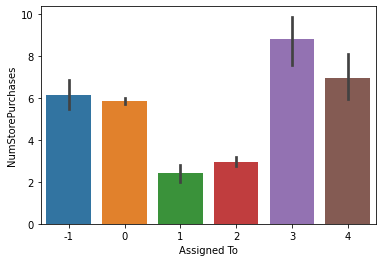

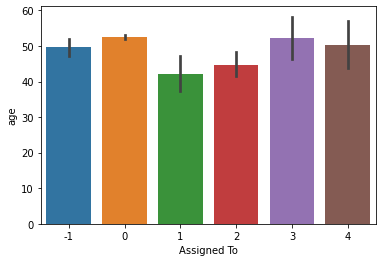

In [35]:
new_numerical_v = ['Income', 'Recency', 'MntWines',
       'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'age']

for i in new_numerical_v:
    plt.figure()
    sns.barplot(y=new_sk_df[i], x=new_sk_df['Assigned To'])
    plt.show()

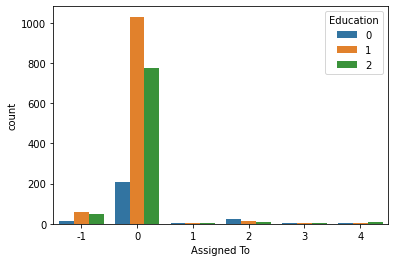

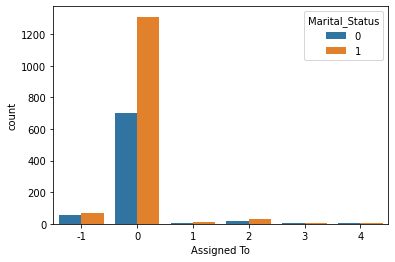

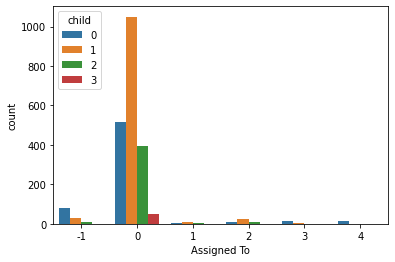

In [36]:
new_categorical_v = ['Education', 'Marital_Status', 'child']

for i in new_categorical_v:
    plt.figure()
    sns.countplot(x=new_sk_df['Assigned To'], data=new_sk_df, hue=new_sk_df[i])
    plt.show()

### Summary from Data Visulization
### With Outliers


**Findings**


**Cluster 0:** 
- not influenced by the outliers
- may not respond actively as we thought

**Cluster 1:**
- Large range in preferences of gold products, discounts, and online shopping.

**Cluster 2:**
- reclassify as high-income group but actually spend less
- higher education background & relatively older

**Cluster 3 & Cluster 4:**
- not affected so much
- Cluster 3 represents middle-class families
- Cluster 4 has few outliers to influence the results


The Cluster 0 customers are generally not influenced by the outliers, but we might overestimate their purchasing power. According to our plot, Cluster 1 customers tend to purchase more with a discount rather than them. Cluster 0 may not respond to the marketing campaign as actively as we thought before, even though there's a discount. 

One interesting thing about cluster 1 customers is that this group has significant differences in buying gold products, discounts, and online shopping. Since cluster 1 customers' choices are more variable than expected, their business behavior is more difficult to predict.

Cluster 2 with outliers actually enters into a high-income group and spends much less on every kind of product. This cluster also has a higher level of education than we thought. As they are relatively older, cluster 2 customers may have less living expenses, tend to purchase more in stores, and want to save money for their descendants. 

Both cluster 3 and cluster 4 are not affected by the outliers primarily. The front one is reasonable as cluster 3 customers fall on the intermediate group in nearly every aspect. For cluster 4, we know that there's only one outlier in the high-income group according to our data cleaning process. Thus, there's no apparent difference between these two clusters.




## 4.3 Classification

### Normalize all the attibutes to be between [0,1]

In [38]:
df_nor = df_consumer.copy()

In [39]:
target_col = 'Response'

In [40]:
dict_normalize = dict()
for col in df_nor.columns:
    if col != target_col:
        dict_normalize[col] = (df_nor[col].min(), df_nor[col].max())
        df_nor[col] = (df_nor[col] - dict_normalize[col][0])/(dict_normalize[col][1]-dict_normalize[col][0])

In [41]:
df_nor

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,age,child,Response
0,0.5,0.0,0.351086,0.651685,0.425318,0.442211,0.664093,0.335878,0.274143,0.200000,0.296296,0.307692,0.378641,0.000000,1
1,0.5,0.0,0.277680,0.426966,0.007368,0.005025,0.007722,0.003817,0.018692,0.133333,0.037037,0.153846,0.407767,0.666667,0
2,0.5,1.0,0.434956,0.292135,0.285332,0.246231,0.428571,0.080153,0.130841,0.066667,0.296296,0.769231,0.300971,0.000000,0
3,0.5,1.0,0.155079,0.292135,0.007368,0.020101,0.038610,0.011450,0.015576,0.133333,0.074074,0.307692,0.116505,0.333333,0
5,1.0,1.0,0.378317,0.179775,0.348292,0.211055,0.000000,0.160305,0.043614,0.133333,0.222222,0.769231,0.281553,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,0.5,1.0,0.203471,0.910112,0.002009,0.015075,0.023166,0.007634,0.028037,0.066667,0.037037,0.153846,0.213592,0.333333,0
2235,0.5,1.0,0.370288,0.516854,0.474883,0.216080,0.162162,0.450382,0.769470,0.133333,0.333333,0.307692,0.281553,0.333333,0
2236,1.0,1.0,0.387659,0.629213,0.271936,0.000000,0.000000,0.000000,0.024922,0.466667,0.296296,0.384615,0.485437,1.000000,0
2238,1.0,1.0,0.420217,0.089888,0.286671,0.150754,0.308880,0.114504,0.190031,0.133333,0.222222,0.769231,0.388350,0.333333,0


### Create Testing Set and Training Set

In [42]:
from sklearn.model_selection import train_test_split

# Testing: 30%, Training: 70%
X_train, X_test, y_train, y_test = train_test_split(df_nor, df_nor['Response'], test_size=0.3, random_state=1)

### Implement using sklearn.neighbors.KNeighborsClassifier

#### Source: Professor Kia's Code-Example-018-kNN.ipynb https://github.com/kiat/Elements-of-Data-Analytics/blob/main/Code-Example-018-kNN.ipynb

In [43]:
ytrain = np.array(y_train).astype('int')
ytest = np.array(y_test).astype('int')

In [44]:
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [45]:
def knn(k, X_train, X_test, ytrain, ytest):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, ytrain)
    predictions= neigh.predict(X_test)
    correct = np.sum(predictions == ytest)
    return correct/len(predictions)

In [46]:
# We test our classification model by using various k values
poss_k = [1,3, 8, 13,17, 25,30, 40, 50, 60, 75, 90, 100, 150, 200]
acc_k = np.zeros(len(poss_k))

acc_indx = 0

for k in poss_k:
    acc_k[acc_indx] = knn(k, X_train.drop(['Response'], axis=1), X_test.drop(['Response'], axis=1), ytrain, ytest)
    print("k = ", k , "Acc=", acc_k[acc_indx])
    acc_indx = acc_indx + 1

d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


k =  1 Acc= 0.7833333333333333
k =  3 Acc= 0.8283333333333334


d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


k =  8 Acc= 0.8333333333333334
k =  13 Acc= 0.835
k =  17 Acc= 0.8333333333333334


d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


k =  25 Acc= 0.8366666666666667
k =  30 Acc= 0.83


d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


k =  40 Acc= 0.8266666666666667
k =  50 Acc= 0.825


d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


k =  60 Acc= 0.8233333333333334
k =  75 Acc= 0.8233333333333334
k =  90 Acc= 0.8233333333333334


d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


k =  100 Acc= 0.8233333333333334
k =  150 Acc= 0.8233333333333334


d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


k =  200 Acc= 0.8233333333333334


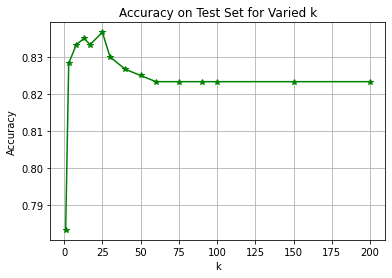

In [47]:
plt.plot(poss_k,acc_k,'g-*')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Set for Varied k')
plt.grid('on')
plt.show()

### To improve the results: Select the Model with Best k-value k=13

In [48]:
from sklearn.metrics import classification_report

neigh = KNeighborsClassifier(n_neighbors=13)

neigh.fit(X_train.drop(['Response'], axis=1), ytrain)

predictions= neigh.predict(X_test.drop(['Response'], axis=1))

print(predictions)
print('')

correct = np.sum(predictions == ytest)
acc = correct/len(predictions)

print('Classification Report:')
print(classification_report(y_test,predictions))
print('Accuary:',acc.round(3))

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

d:\python\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In our classification report, 1 means customer accepts the offer in the campaign, while 0 means customer does not accept the offer in the campaign. 

We can say that our model successfully predicted that customers does not accept the offer in the campaign (precision = 0.84, close to 1). At the same time, it was less successful in correctly predicting that customers accepts the offer in the campaign (precision = 0.72).

Also, our model had a strong ability to correctly predict that customers actually do not accept the offer in the campaign (recall = 0.99) but lower ability to correctly predict those who accept (recall = 0.12).

The f1-score showed that after calculating the weighted importance of precision and recall, the overall effectiveness of the model is 0.91 for customers do not react in the campaign and 0.21 for those accept the offer.

## Summary & Conclusion

Based on our analysis, we think that the customers' behaviors and characteristics are hard to analyze with limited amount of data and explanatory variables. Therefore, besides trying serveral possible k values to improve the accuracy of the model, we also expect to include more related variables and data to implement with different learning models to improve our results.
 

## Reference

#### Source: Professor Kia's Code-Example-018-kNN.ipynb https://github.com/kiat/Elements-of-Data-Analytics/blob/main/Code-Example-018-kNN.ipynb
#### Source: https://www.kaggle.com/imakash3011/customer-personality-analysis